In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-12-31'

df = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data[['Open', 'High', 'Low', 'Volume']], train_data['Close']
X_test, y_test = test_data[['Open', 'High', 'Low', 'Volume']], test_data['Close']

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'ypred: {y_pred}')

Mean Absolute Error: 0.69
ypred: [142.28922159 143.9893378  142.90209402 145.62223344 143.09230698
 137.58590086 135.02034265 132.08576074 131.77395618 136.1317308
 131.23410705 131.16488603 129.20567308 127.79440974 129.92553386
 128.91850484 125.89586536 126.94769071 125.73285875 128.88533364
 132.56187039 129.37938571 132.56095455 132.18727045 134.25069389
 136.39061359 136.90914431 135.69055182 136.79460243 142.51347805
 142.74983902 140.52038067 143.02514537 146.63973794 143.69920743
 143.71779581 144.13154199 150.18862986 156.10418234 151.4831265
 154.62434071 152.2290183  151.49209376 150.82986191 153.77177526
 152.47213355 154.93358267 155.77448896 151.61026876 149.64562721
 148.37095559 147.94568914 145.9552871  148.70000225 148.58358934
 145.62877594 145.9857446  150.10935061 155.62048376 151.83189928
 152.49774629 151.6877569  148.675985   152.38352424 152.11042862
 151.89227612 155.47797956 155.06632025 156.6666094  158.41417444
 160.52013287 160.21697242 159.24179914 158.9

In [ ]:
# Fetch real-time data
stock_data = yf.Ticker(stock_symbol)
current_data = stock_data.history(period='1d')  # Fetch data for the current day

# Extract the current values
current_open = current_data['Open'].iloc[0]
current_high = current_data['High'].iloc[0]
current_low = current_data['Low'].iloc[0]
current_volume = current_data['Volume'].iloc[0]

# Print the current values
print(f'Current Open: {current_open:.2f}')
print(f'Current High: {current_high:.2f}')
print(f'Current Low: {current_low:.2f}')
print(f'Current Volume: {current_volume:.2f}')


Current Open: 188.40
Current High: 188.85
Current Low: 181.47
Current Volume: 81650300.00


In [ ]:
# Prepare input features for prediction (you can use real or simulated data)
next_day_features = np.array([[current_open, current_high, current_low, current_volume]])

# Predict the next day's closing price
next_day_closing_price = model.predict(next_day_features)
print(f'Predicted Next Day Closing Price: {next_day_closing_price[0]:.2f}')


Predicted Next Day Closing Price: 183.12


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


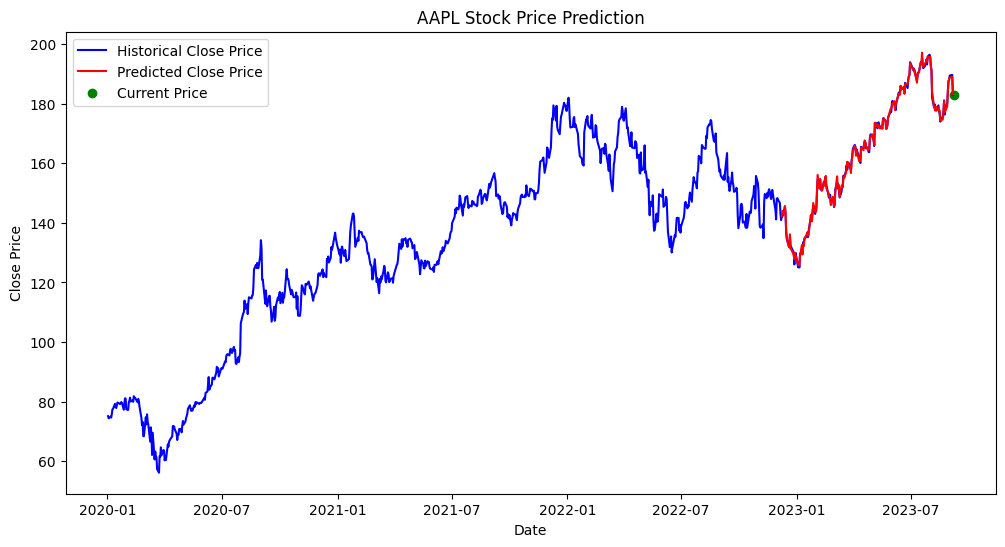

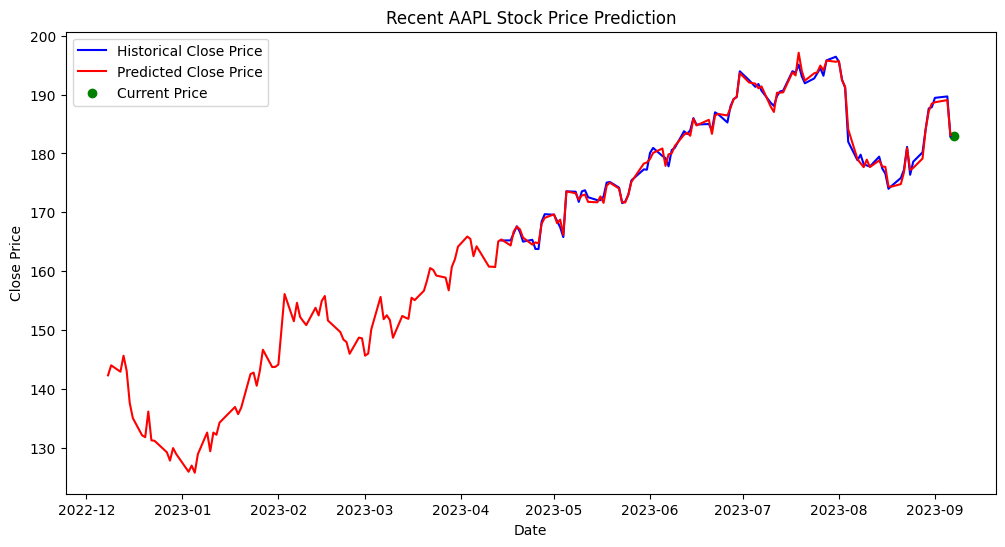

In [ ]:
import datetime

# Get the current date
current_date = datetime.date.today()

# Plot historical and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Close Price', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Close Price', color='red')
plt.scatter(current_date, df['Close'].iloc[-1], color='green', marker='o', label='Current Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.legend()

# Plot zoomed-in view for recent data
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['Close'].tail(100), label='Historical Close Price', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Close Price', color='red')
plt.scatter(current_date, df['Close'].iloc[-1], color='green', marker='o', label='Current Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Recent {stock_symbol} Stock Price Prediction')
plt.legend()
plt.show()

